In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.compat import pickle_compat
from scipy.signal import welch, butter, filtfilt
from itertools import combinations
from scipy import stats

In [2]:
pkl_path = "data/lfp_data.pkl" # You should place here the path to where the .pkl file with the LFP/Single unit information is :D
pkl_path_aversive = "data/lfp_epochs_with_spikes_by_region_aversive.pkl" # You should place here the path to where the .pkl file with the LFP/Single unit information is :D
pkl_path_rewarded = "data/lfp_epochs_with_spikes_by_region_session_rewarded.pkl" # You should place here the path to where the .pkl file with the LFP/Single unit information is :D

df = pd.read_pickle(pkl_path_rewarded)


In [3]:
pkl_path_aversive = "data\lfp_epochs_with_spikes_by_region-av-2.pkl" # You should place here the path to where the .pkl file with the LFP/Single unit information is :D

with open(pkl_path_aversive, "rb") as f:
    df = pickle_compat.load(f)

print(df.head())

  session epoch_label  epoch_idx  t_start   t_end  \
0      08       REM I          0   2644.0  2704.0   
1      08       REM I          1   2926.0  3014.0   
2      08       REM I          2   3143.0  3250.0   
3      08       REM I          3   3974.0  4000.0   
4      08       REM I          4   4079.0  4280.0   

                                          time_epoch  \
0  [2644.0, 2644.0008000000003, 2644.0016, 2644.0...   
1  [2926.0, 2926.0008000000003, 2926.0016, 2926.0...   
2  [3143.0, 3143.0008000000003, 3143.0016, 3143.0...   
3  [3974.0, 3974.0008000000003, 3974.0016, 3974.0...   
4  [4079.0, 4079.0008000000003, 4079.0016, 4079.0...   

                                             bla_lfp  \
0  [-22.907072436816463, -29.30111259147509, -94....   
1  [-2.7496611542812275, 117.98764540927965, 5.90...   
2  [-84.84061899660507, -178.0472438626934, -116....   
3  [-35.386775609204506, 1.1929148924929223, -33....   
4  [29.66908818181804, 42.61478455299874, 17.8757...   

       

C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_for_boxplot,
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_for_boxplot,
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_for_boxplot,
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib


NREM I:
  vHPC↔dHPC vs BLA↔dHPC: p=0.0000 ***
  vHPC↔dHPC vs BLA↔vHPC: p=0.0000 ***
  BLA↔dHPC vs BLA↔vHPC: p=0.0000 ***

NREM II:
  vHPC↔dHPC vs BLA↔dHPC: p=0.0000 ***
  vHPC↔dHPC vs BLA↔vHPC: p=0.0000 ***
  BLA↔dHPC vs BLA↔vHPC: p=0.0045 **

REM I:
  vHPC↔dHPC vs BLA↔dHPC: p=0.0000 ***
  vHPC↔dHPC vs BLA↔vHPC: p=0.0000 ***
  BLA↔dHPC vs BLA↔vHPC: p=0.2383 ns

REM II:
  vHPC↔dHPC vs BLA↔dHPC: p=0.0000 ***
  vHPC↔dHPC vs BLA↔vHPC: p=0.0000 ***
  BLA↔dHPC vs BLA↔vHPC: p=0.5188 ns


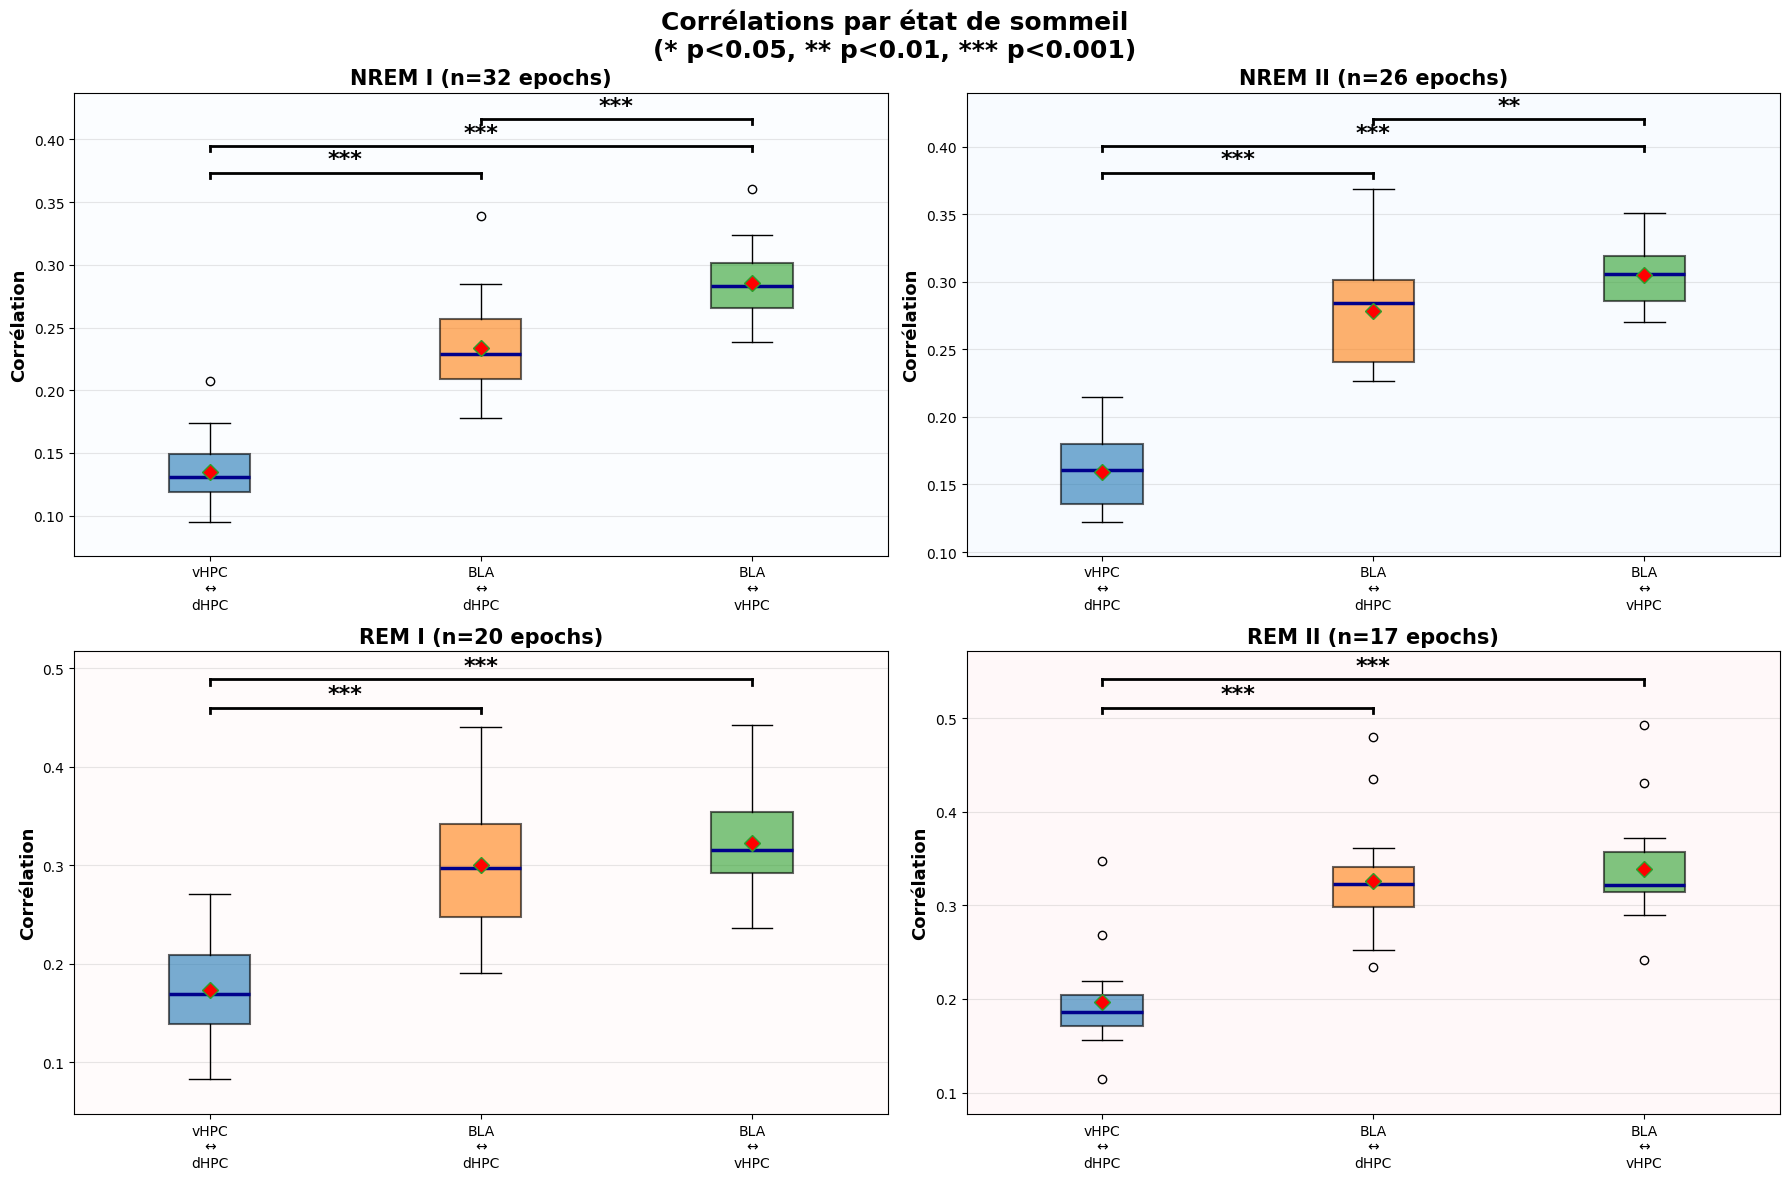

C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:168: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([data1, data2],
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:168: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([data1, data2],
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:168: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([data1, data2],
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:168: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3

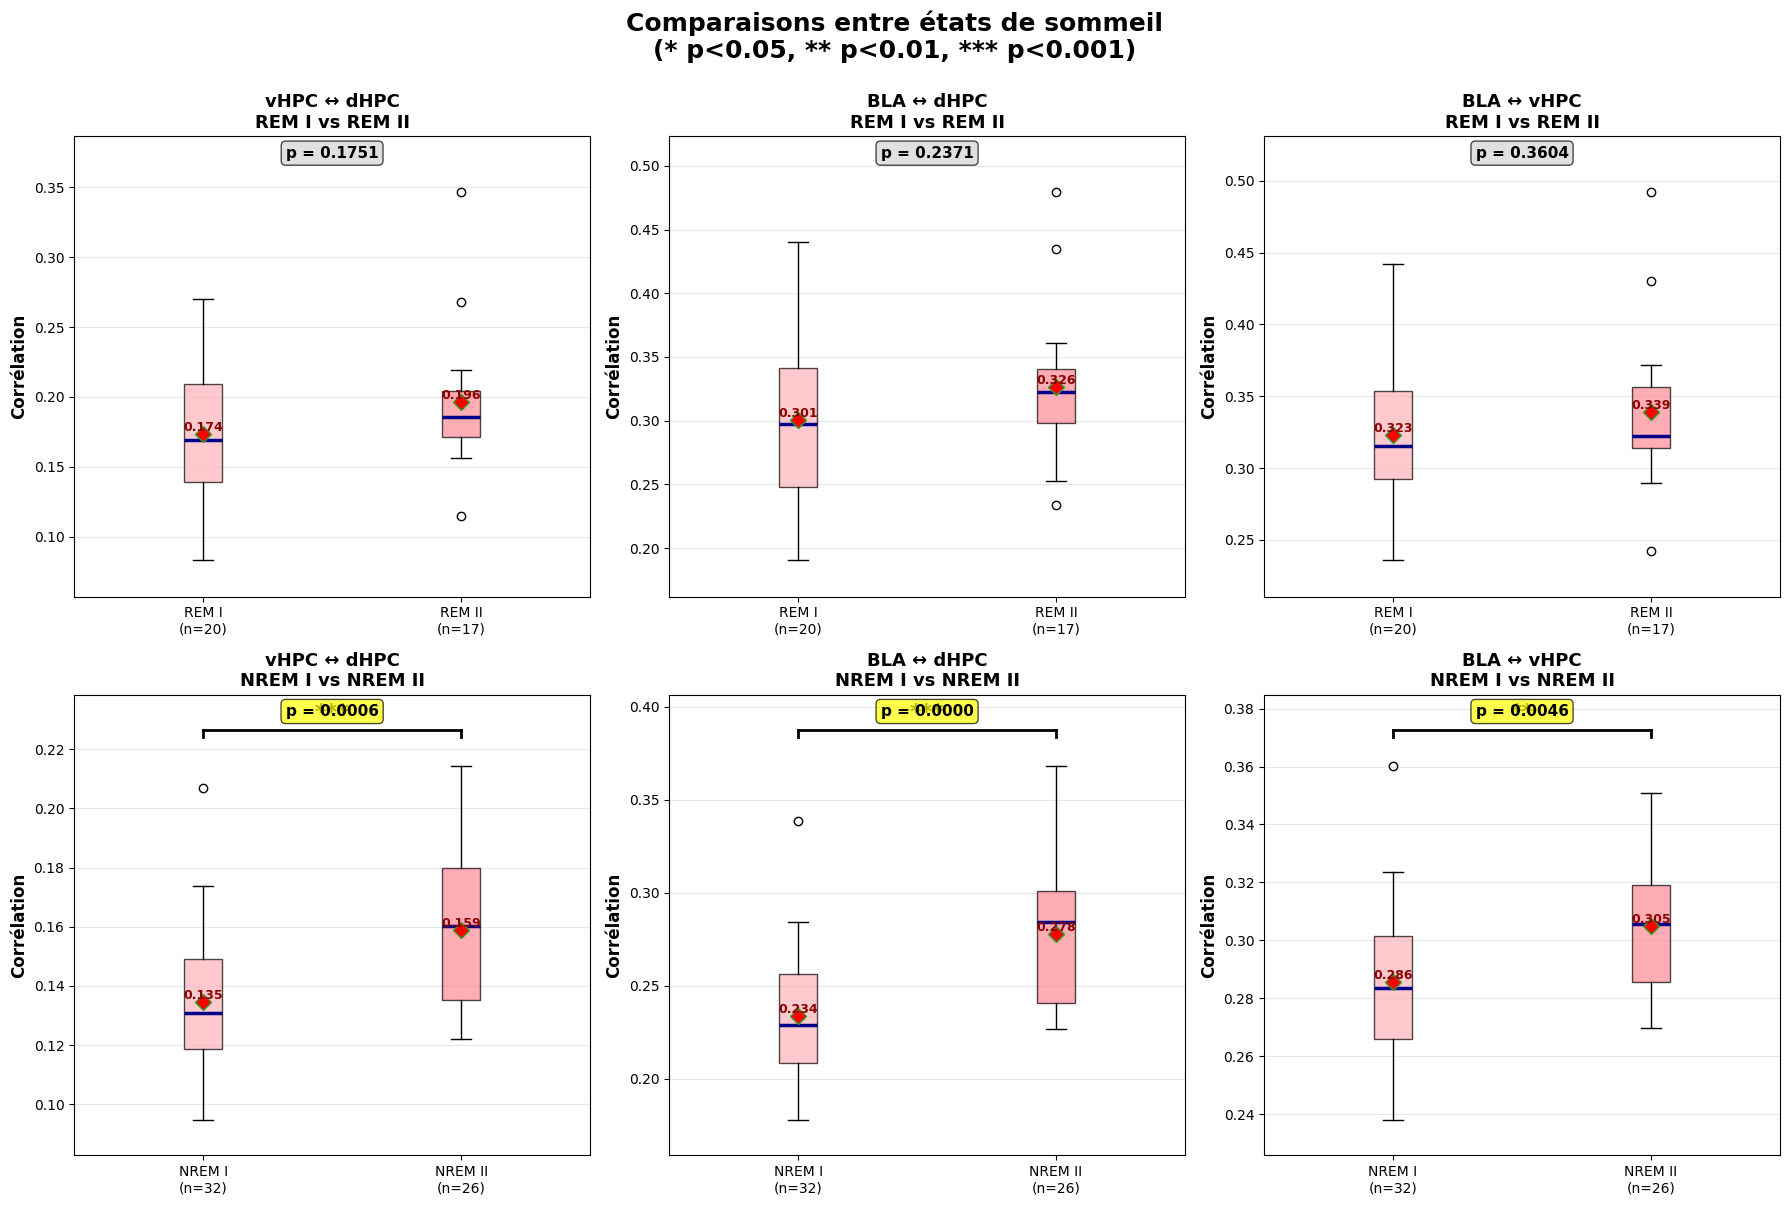

C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:279: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([diff_clean],
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:279: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([diff_clean],
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:279: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([diff_clean],
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:279: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; su

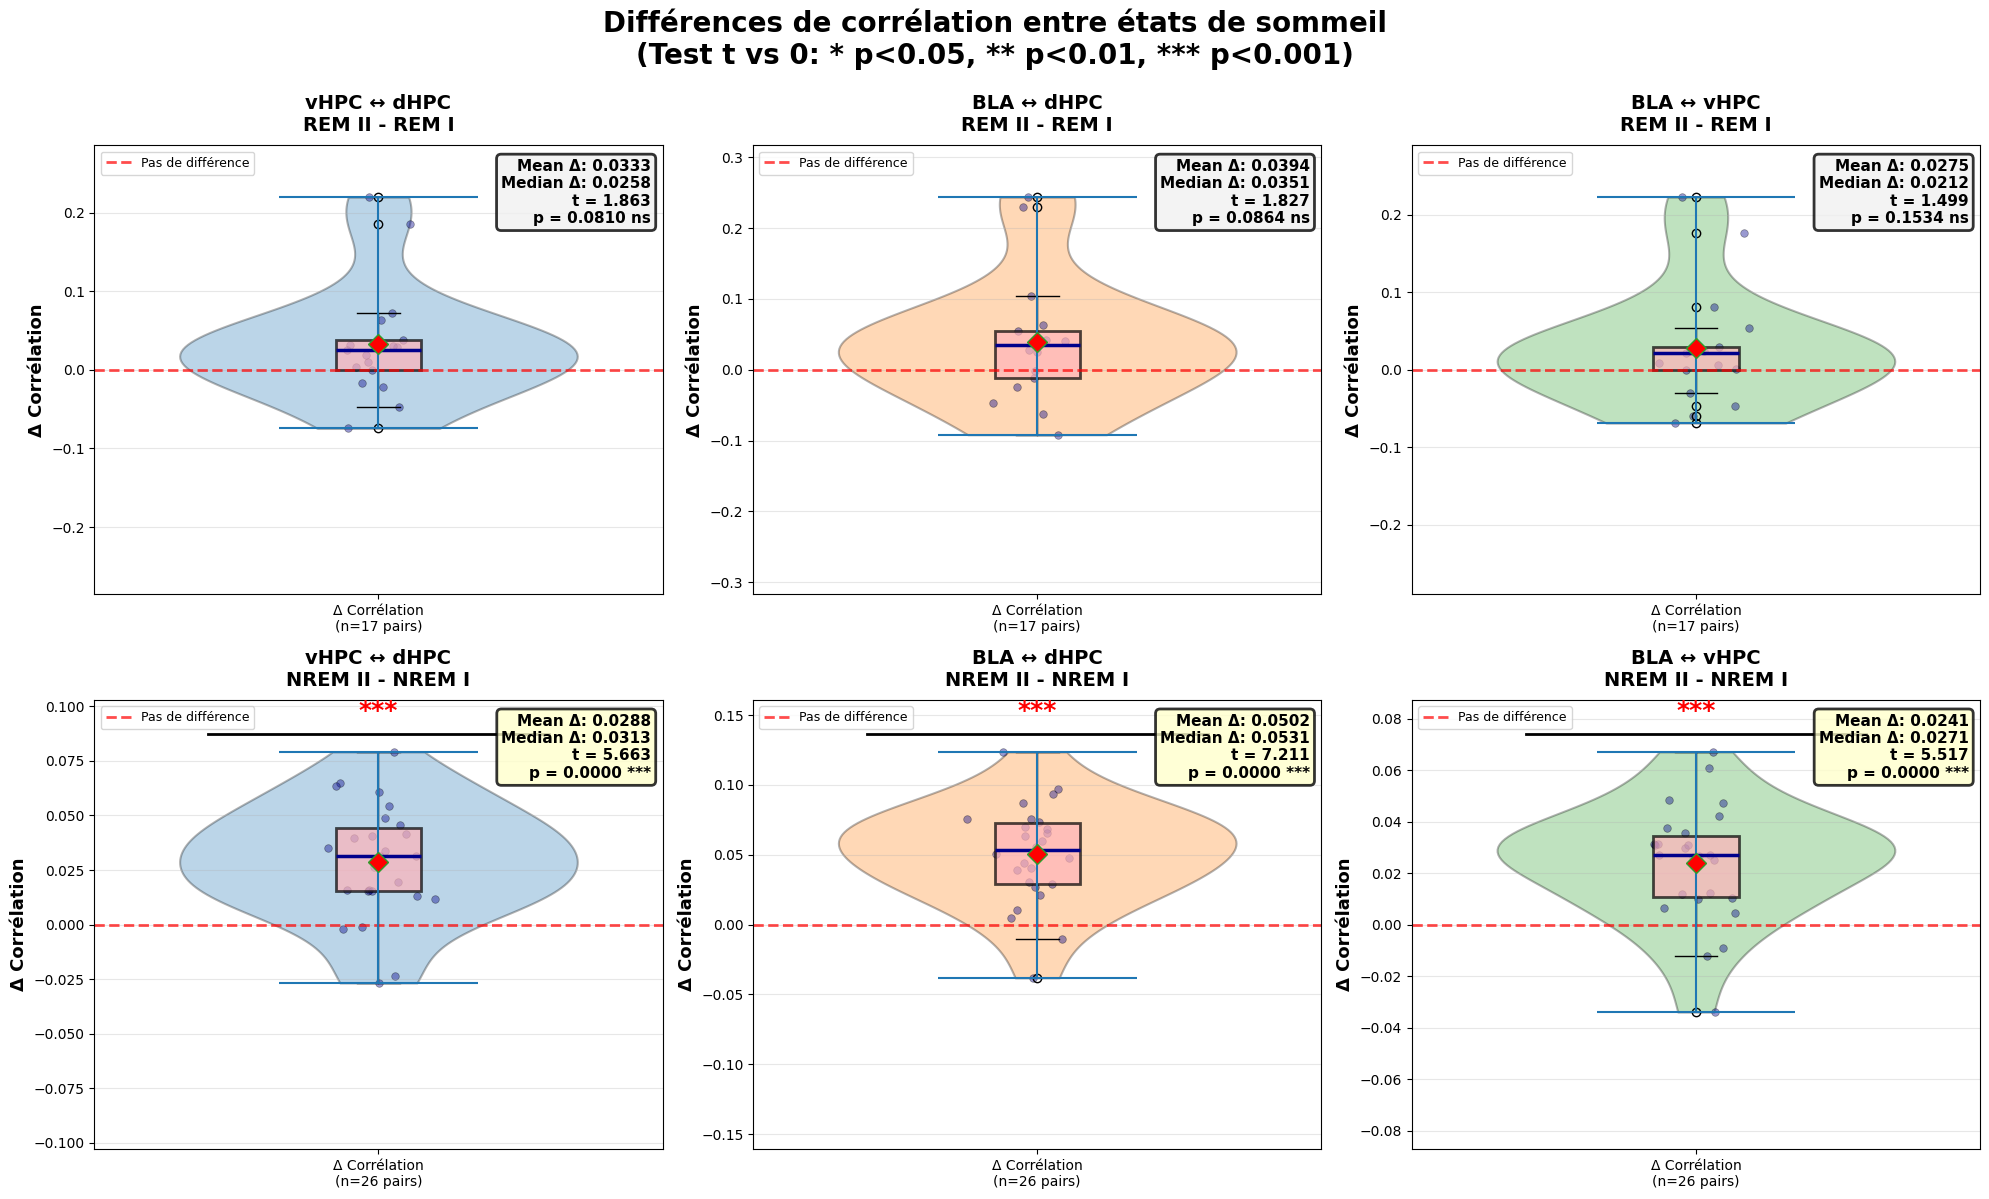

In [4]:


def plot_correlations_boxplot_by_state(df):
    """
    Box plots avec significativité DANS chaque état (entre paires de régions).
    """
    pairs = [
        ('vHPC_lfp', 'dHPC_lfp', 'vHPC ↔ dHPC', '#1f77b4'),
        ('bla_lfp', 'dHPC_lfp', 'BLA ↔ dHPC', '#ff7f0e'),
        ('bla_lfp', 'vHPC_lfp', 'BLA ↔ vHPC', '#2ca02c')
    ]
    
    correlations = {}
    for name1, name2, label, color in pairs:
        corrs = compute_lfp_correlation(df, name1, name2)
        correlations[label] = (corrs, color)
    
    epoch_labels = df['epoch_label'].values
    unique_states = np.unique(epoch_labels)
    
    stage_colors = {
        'REM I': '#FFE5E5', 'REM II': '#FFD4D8',
        'NREM I': '#E5F5FF', 'NREM II': '#D4EAFF',
        'Wake': '#E5FFE5'
    }
    
    n_states = len(unique_states)
    n_cols = 2
    n_rows = (n_states + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    axes = axes.flatten() if n_states > 1 else [axes]
    
    for state_idx, state in enumerate(unique_states):
        ax = axes[state_idx]
        
        state_mask = epoch_labels == state
        n_epochs_state = np.sum(state_mask)
        
        bg_color = stage_colors.get(state, '#F5F5F5')
        ax.set_facecolor(bg_color)
        ax.patch.set_alpha(0.15)
        
        data_for_boxplot = []
        colors_for_boxplot = []
        labels_for_boxplot = []
        
        for label, (corrs, color) in correlations.items():
            state_corrs = corrs[state_mask]
            state_corrs_clean = state_corrs[~np.isnan(state_corrs)]
            
            if len(state_corrs_clean) > 0:
                data_for_boxplot.append(state_corrs_clean)
                colors_for_boxplot.append(color)
                labels_for_boxplot.append(label.replace(' ↔ ', '\n↔\n'))
        
        bp = ax.boxplot(data_for_boxplot, 
                       labels=labels_for_boxplot,
                       patch_artist=True,
                       showmeans=True,
                       meanprops=dict(marker='D', markerfacecolor='red', markersize=8),
                       medianprops=dict(color='darkblue', linewidth=2.5),
                       boxprops=dict(linewidth=1.5))
        
        for patch, color in zip(bp['boxes'], colors_for_boxplot):
            patch.set_facecolor(color)
            patch.set_alpha(0.6)
        
        # Tests statistiques
        print(f"\n{state}:")
        all_state_corrs = np.concatenate(data_for_boxplot)
        y_min, y_max = np.min(all_state_corrs), np.max(all_state_corrs)
        y_range = y_max - y_min
        
        comparisons_list = list(combinations(range(len(data_for_boxplot)), 2))
        sig_comparisons = []
        
        for i, j in comparisons_list:
            t_stat, p_val = stats.ttest_ind(data_for_boxplot[i], data_for_boxplot[j])
            sig_marker = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
            print(f"  {labels_for_boxplot[i].replace(chr(10), '')} vs "
                  f"{labels_for_boxplot[j].replace(chr(10), '')}: p={p_val:.4f} {sig_marker}")
            
            if p_val < 0.05:
                sig_comparisons.append((i, j, p_val))
        
        # Barres de significativité
        y_offset = y_max + 0.05 * y_range
        bar_spacing = 0.08 * y_range
        
        for level, (i, j, p_val) in enumerate(sig_comparisons):
            y_bar = y_offset + level * bar_spacing
            
            ax.plot([i+1, j+1], [y_bar, y_bar], 'k-', linewidth=2)
            ax.plot([i+1, i+1], [y_bar - 0.015*y_range, y_bar], 'k-', linewidth=2)
            ax.plot([j+1, j+1], [y_bar - 0.015*y_range, y_bar], 'k-', linewidth=2)
            
            sig_text = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*'
            ax.text((i+j)/2 + 1, y_bar + 0.01*y_range, sig_text,
                   ha='center', va='bottom', fontsize=16, fontweight='bold')
        
        # Ajuster Y
        if len(sig_comparisons) > 0:
            y_top = y_offset + (len(sig_comparisons)-1)*bar_spacing + 0.08*y_range
        else:
            y_top = y_max + 0.15*y_range
        
        y_bottom = max(0, y_min - 0.1*y_range)
        ax.set_ylim(y_bottom, min(1, y_top))
        
        ax.set_ylabel('Corrélation', fontsize=13, fontweight='bold')
        ax.set_title(f'{state} (n={n_epochs_state} epochs)', 
                    fontsize=15, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
    
    for idx in range(n_states, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Corrélations par état de sommeil\n(* p<0.05, ** p<0.01, *** p<0.001)', 
                fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()


def plot_state_comparisons(df):
    """
    Comparaisons directes entre états (REM I vs REM II, NREM I vs NREM II, etc.).
    """
    pairs = [
        ('vHPC_lfp', 'dHPC_lfp', 'vHPC ↔ dHPC', '#1f77b4'),
        ('bla_lfp', 'dHPC_lfp', 'BLA ↔ dHPC', '#ff7f0e'),
        ('bla_lfp', 'vHPC_lfp', 'BLA ↔ vHPC', '#2ca02c')
    ]
    
    correlations = {}
    for name1, name2, label, color in pairs:
        corrs = compute_lfp_correlation(df, name1, name2)
        correlations[label] = (corrs, color)
    
    epoch_labels = df['epoch_label'].values
    
    # Comparaisons à faire
    state_comparisons = [
        ('REM I', 'REM II', 'REM I vs REM II'),
        ('NREM I', 'NREM II', 'NREM I vs NREM II')
    ]
    
    # Figure avec 2 lignes (REM, NREM) x 3 colonnes (paires)
    fig, axes = plt.subplots(len(state_comparisons), len(pairs), 
                            figsize=(18, 6*len(state_comparisons)))
    
    if len(state_comparisons) == 1:
        axes = axes.reshape(1, -1)
    
    for comp_idx, (state1, state2, comp_title) in enumerate(state_comparisons):
        for pair_idx, (name1, name2, pair_label, pair_color) in enumerate(pairs):
            ax = axes[comp_idx, pair_idx]
            
            # Récupérer les données pour les deux états
            corrs = correlations[pair_label][0]
            
            mask1 = epoch_labels == state1
            mask2 = epoch_labels == state2
            
            data1 = corrs[mask1][~np.isnan(corrs[mask1])]
            data2 = corrs[mask2][~np.isnan(corrs[mask2])]
            
            if len(data1) > 0 and len(data2) > 0:
                # Boxplot
                bp = ax.boxplot([data1, data2], 
                               labels=[f'{state1}\n(n={len(data1)})', 
                                      f'{state2}\n(n={len(data2)})'],
                               patch_artist=True,
                               showmeans=True,
                               meanprops=dict(marker='D', markerfacecolor='red', markersize=8),
                               medianprops=dict(color='darkblue', linewidth=2.5))
                
                # Couleurs
                bp['boxes'][0].set_facecolor('#FFB3BA')
                bp['boxes'][0].set_alpha(0.7)
                bp['boxes'][1].set_facecolor('#FF8A95')
                bp['boxes'][1].set_alpha(0.7)
                
                # Test statistique
                t_stat, p_val = stats.ttest_ind(data1, data2)
                sig = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
                
                # Barre de significativité
                y_max = max(np.max(data1), np.max(data2))
                y_range = y_max - min(np.min(data1), np.min(data2))
                y_bar = y_max + 0.1 * y_range
                
                if p_val < 0.05:
                    ax.plot([1, 2], [y_bar, y_bar], 'k-', linewidth=2)
                    ax.plot([1, 1], [y_bar - 0.02*y_range, y_bar], 'k-', linewidth=2)
                    ax.plot([2, 2], [y_bar - 0.02*y_range, y_bar], 'k-', linewidth=2)
                    ax.text(1.5, y_bar + 0.02*y_range, sig,
                           ha='center', va='bottom', fontsize=16, fontweight='bold')
                
                # Texte p-value
                ax.text(0.5, 0.98, f'p = {p_val:.4f}',
                       transform=ax.transAxes, fontsize=11, fontweight='bold',
                       ha='center', va='top',
                       bbox=dict(boxstyle='round', facecolor='yellow' if p_val < 0.05 else 'lightgray', 
                                alpha=0.7))
                
                # Échelle
                y_bottom = max(0, min(np.min(data1), np.min(data2)) - 0.1*y_range)
                y_top = y_bar + 0.1*y_range if p_val < 0.05 else y_max + 0.15*y_range
                ax.set_ylim(y_bottom, min(1, y_top))
                
                # Moyennes
                mean1, mean2 = np.mean(data1), np.mean(data2)
                ax.text(1, mean1, f'{mean1:.3f}', ha='center', va='bottom',
                       fontsize=9, fontweight='bold', color='darkred')
                ax.text(2, mean2, f'{mean2:.3f}', ha='center', va='bottom',
                       fontsize=9, fontweight='bold', color='darkred')
            
            ax.set_ylabel('Corrélation', fontsize=12, fontweight='bold')
            ax.set_title(f'{pair_label}\n{comp_title}', fontsize=13, fontweight='bold')
            ax.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle('Comparaisons entre états de sommeil\n(* p<0.05, ** p<0.01, *** p<0.001)', 
                fontsize=18, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()


def plot_correlation_differences(df):
    """
    Visualise les DIFFÉRENCES de corrélation entre états (REM II - REM I, NREM II - NREM I).
    Une figure avec 2 lignes x 3 colonnes (6 subplots).
    """
    pairs = [
        ('vHPC_lfp', 'dHPC_lfp', 'vHPC ↔ dHPC', '#1f77b4'),
        ('bla_lfp', 'dHPC_lfp', 'BLA ↔ dHPC', '#ff7f0e'),
        ('bla_lfp', 'vHPC_lfp', 'BLA ↔ vHPC', '#2ca02c')
    ]
    
    # Calculer les corrélations
    correlations = {}
    for name1, name2, label, color in pairs:
        corrs = compute_lfp_correlation(df, name1, name2)
        correlations[label] = (corrs, color)
    
    epoch_labels = df['epoch_label'].values
    
    # Comparaisons à faire (INVERSÉ : état2 - état1)
    state_comparisons = [
        ('REM I', 'REM II', 'REM II - REM I'),
        ('NREM I', 'NREM II', 'NREM II - NREM I')
    ]
    
    # Figure 2 lignes x 3 colonnes
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    for comp_idx, (state1, state2, comp_title) in enumerate(state_comparisons):
        for pair_idx, (name1, name2, pair_label, pair_color) in enumerate(pairs):
            ax = axes[comp_idx, pair_idx]
            
            # Récupérer les corrélations pour chaque état
            corrs = correlations[pair_label][0]
            
            mask1 = epoch_labels == state1
            mask2 = epoch_labels == state2
            
            # Données pour chaque état
            data1 = corrs[mask1]
            data2 = corrs[mask2]
            
            # Calculer les différences (appariées si même longueur, sinon non-appariées)
            min_len = min(len(data1), len(data2))
            
            if min_len > 0:
                # INVERSÉ : état2 - état1
                diff = data2[:min_len] - data1[:min_len]
                diff_clean = diff[~np.isnan(diff)]
                
                if len(diff_clean) > 0:
                    # Box plot de la différence
                    bp = ax.boxplot([diff_clean], 
                                   labels=[f'Δ Corrélation\n(n={len(diff_clean)} pairs)'],
                                   patch_artist=True,
                                   showmeans=True,
                                   meanprops=dict(marker='D', markerfacecolor='red', markersize=10),
                                   medianprops=dict(color='darkblue', linewidth=2.5),
                                   boxprops=dict(linewidth=2))
                    
                    # Couleur selon le signe de la moyenne
                    mean_diff = np.mean(diff_clean)
                    if mean_diff > 0:
                        bp['boxes'][0].set_facecolor('#FFB3BA')  # Rouge clair
                    else:
                        bp['boxes'][0].set_facecolor('#BAE1FF')  # Bleu clair
                    bp['boxes'][0].set_alpha(0.7)
                    
                    # Test t contre zéro (one-sample t-test)
                    t_stat, p_val = stats.ttest_1samp(diff_clean, 0)
                    sig = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
                    
                    # Ligne à zéro
                    ax.axhline(y=0, color='red', linestyle='--', linewidth=2, 
                              label='Pas de différence', alpha=0.7)
                    
                    # Afficher stats
                    stats_text = f'Mean Δ: {mean_diff:.4f}\n'
                    stats_text += f'Median Δ: {np.median(diff_clean):.4f}\n'
                    stats_text += f't = {t_stat:.3f}\n'
                    stats_text += f'p = {p_val:.4f} {sig}'
                    
                    # Couleur du fond selon significativité
                    bg_color = '#FFFFCC' if p_val < 0.05 else '#F0F0F0'
                    
                    ax.text(0.98, 0.97, stats_text,
                           transform=ax.transAxes,
                           fontsize=11,
                           fontweight='bold',
                           verticalalignment='top',
                           horizontalalignment='right',
                           bbox=dict(boxstyle='round', facecolor=bg_color, 
                                   alpha=0.8, edgecolor='black', linewidth=2))
                    
                    # Violin plot en overlay
                    parts = ax.violinplot([diff_clean], positions=[1], 
                                         showmeans=False, showmedians=False,
                                         widths=0.7)
                    for pc in parts['bodies']:
                        pc.set_facecolor(pair_color)
                        pc.set_alpha(0.3)
                        pc.set_edgecolor('black')
                        pc.set_linewidth(1.5)
                    
                    # Scatter des points individuels
                    x_jitter = np.random.normal(1, 0.04, size=len(diff_clean))
                    ax.scatter(x_jitter, diff_clean, alpha=0.4, s=30, 
                             color='darkblue', edgecolors='black', linewidth=0.5)
                    
                    # Limites Y
                    y_max = max(abs(np.min(diff_clean)), abs(np.max(diff_clean)))
                    y_lim = y_max * 1.3
                    ax.set_ylim(-y_lim, y_lim)
                    
                    # Labels
                    ax.set_ylabel('Δ Corrélation', fontsize=13, fontweight='bold')
                    ax.set_title(f'{pair_label}\n{comp_title}', 
                               fontsize=14, fontweight='bold', pad=10)
                    ax.grid(True, alpha=0.3, axis='y')
                    ax.legend(loc='upper left', fontsize=9)
                    
                    # Barre de significativité si significatif
                    if p_val < 0.05:
                        y_bar = y_lim * 0.85
                        ax.plot([0.7, 1.3], [y_bar, y_bar], 'k-', linewidth=2)
                        ax.text(1, y_bar + y_lim*0.05, sig,
                               ha='center', va='bottom', 
                               fontsize=18, fontweight='bold', color='red')
                else:
                    ax.text(0.5, 0.5, 'Pas de données', 
                           transform=ax.transAxes,
                           ha='center', va='center', fontsize=14)
            else:
                ax.text(0.5, 0.5, 'Pas de données', 
                       transform=ax.transAxes,
                       ha='center', va='center', fontsize=14)
    
    plt.suptitle('Différences de corrélation entre états de sommeil\n' + 
                 '(Test t vs 0: * p<0.05, ** p<0.01, *** p<0.001)', 
                 fontsize=20, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()

def compute_lfp_correlation(df, name1, name2, min_length=100, min_std=0.01):
    """
    Calcule la corrélation entre deux régions LFP par epoch.
    
    Parameters:
    -----------
    df : DataFrame
        DataFrame contenant les signaux LFP
    name1, name2 : str
        Noms des colonnes LFP à corréler
    min_length : int
        Longueur minimale requise pour une epoch
    min_std : float
        Écart-type minimal pour éviter variance nulle
    
    Returns:
    --------
    correlation_values : array
        Corrélations par epoch (avec NaN pour epochs invalides)
    """
    signal1 = df[name1]
    signal2 = df[name2]
    n_epochs = signal1.shape[0]
    
    correlation_values = []
    
    for i in range(n_epochs):
        sig1 = np.array(signal1[i])
        sig2 = np.array(signal2[i])
        
        # Vérifications
        if (len(sig1) < min_length or len(sig2) < min_length or
            np.std(sig1) < min_std or np.std(sig2) < min_std):
            correlation_values.append(np.nan)
        else:
            corr = np.corrcoef(sig1, sig2)[0, 1]
            correlation_values.append(corr)
    
    return np.array(correlation_values)


# ============================================================================
# UTILISATION COMPLÈTE
# ============================================================================

# Figure 1 : Box plots par état (avec significativité DANS chaque état)
plot_correlations_boxplot_by_state(df)

# Figure 2 : Comparaisons ENTRE états (REM I vs REM II, etc.)
plot_state_comparisons(df)

# Figure 3 : DIFFÉRENCES de corrélation entre états (état2 - état1)
plot_correlation_differences(df)

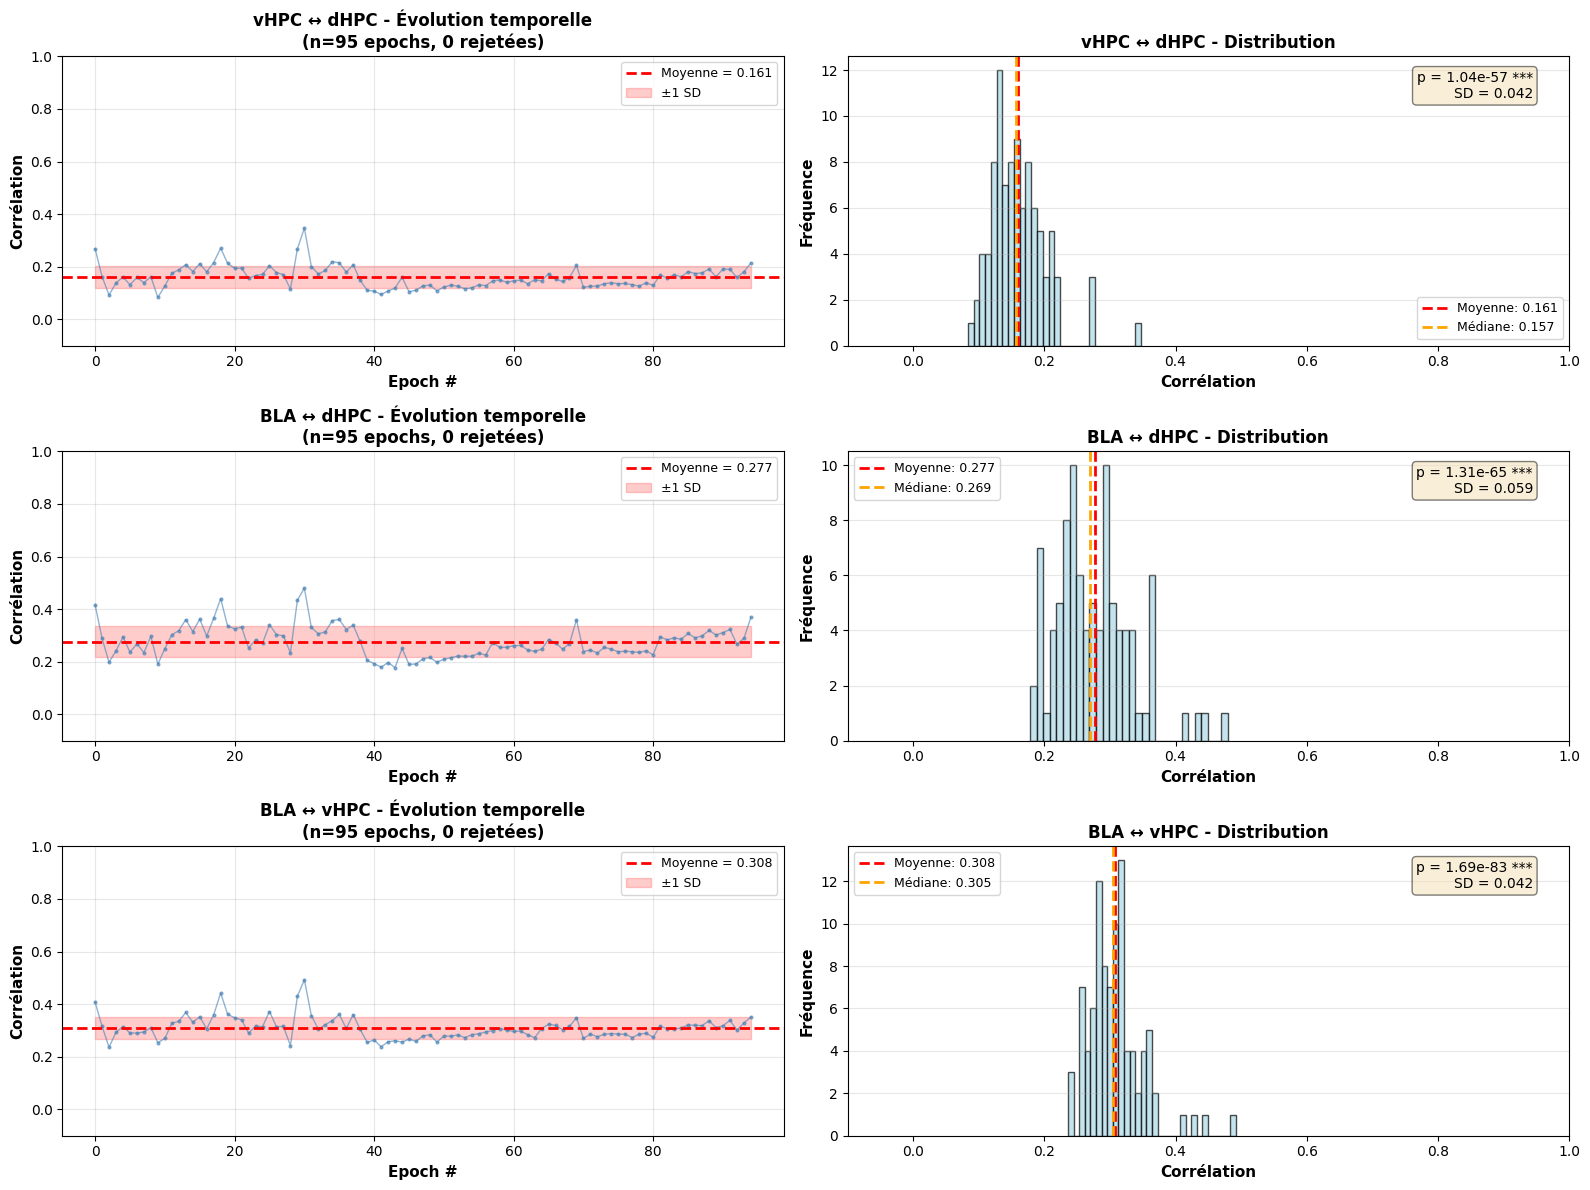

RÉSUMÉ DES CORRÉLATIONS INTER-RÉGIONALES

vHPC ↔ dHPC:
  Epochs valides: 95 / 95 (100.0%)
  Epochs rejetées: 0
  Corrélation: 0.1606 ± 0.0422
  Médiane: 0.1565
  Intervalle: [0.083, 0.347]
  Test t: t=36.89, p=1.04e-57 (***)

BLA ↔ dHPC:
  Epochs valides: 95 / 95 (100.0%)
  Epochs rejetées: 0
  Corrélation: 0.2766 ± 0.0593
  Médiane: 0.2694
  Intervalle: [0.178, 0.480]
  Test t: t=45.25, p=1.31e-65 (***)

BLA ↔ vHPC:
  Epochs valides: 95 / 95 (100.0%)
  Epochs rejetées: 0
  Corrélation: 0.3084 ± 0.0421
  Médiane: 0.3047
  Intervalle: [0.236, 0.492]
  Test t: t=71.06, p=1.69e-83 (***)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def compute_lfp_correlation(df, name1, name2, min_length=100, min_std=0.01):
    """
    Calcule la corrélation entre deux régions LFP par epoch.
    
    Parameters:
    -----------
    df : DataFrame
        DataFrame contenant les signaux LFP
    name1, name2 : str
        Noms des colonnes LFP à corréler
    min_length : int
        Longueur minimale requise pour une epoch
    min_std : float
        Écart-type minimal pour éviter variance nulle
    
    Returns:
    --------
    correlation_values : array
        Corrélations par epoch (avec NaN pour epochs invalides)
    """
    signal1 = df[name1]
    signal2 = df[name2]
    n_epochs = signal1.shape[0]
    
    correlation_values = []
    
    for i in range(n_epochs):
        sig1 = np.array(signal1[i])
        sig2 = np.array(signal2[i])
        
        # Vérifications
        if (len(sig1) < min_length or len(sig2) < min_length or
            np.std(sig1) < min_std or np.std(sig2) < min_std):
            correlation_values.append(np.nan)
        else:
            corr = np.corrcoef(sig1, sig2)[0, 1]
            correlation_values.append(corr)
    
    return np.array(correlation_values)


def analyze_correlations(df, pairs=None):
    """
    Calcule les corrélations pour toutes les paires de régions.
    
    Parameters:
    -----------
    df : DataFrame
        DataFrame contenant les signaux LFP
    pairs : list of tuples, optional
        Liste de tuples (region1, region2, label)
        Si None, utilise les paires par défaut
    
    Returns:
    --------
    results : dict
        Dictionnaire {label: correlation_array}
    """
    if pairs is None:
        pairs = [
            ('vHPC_lfp', 'dHPC_lfp', 'vHPC ↔ dHPC'),
            ('bla_lfp', 'dHPC_lfp', 'BLA ↔ dHPC'),
            ('bla_lfp', 'vHPC_lfp', 'BLA ↔ vHPC')
        ]
    
    results = {}
    
    for region1, region2, label in pairs:
        corrs = compute_lfp_correlation(df, region1, region2)
        results[label] = corrs
    
    return results


def plot_correlation_analysis(results):
    """
    Visualise les corrélations avec évolution temporelle et distribution.
    
    Parameters:
    -----------
    results : dict
        Dictionnaire {label: correlation_array}
    """
    fig, axes = plt.subplots(len(results), 2, figsize=(16, 4*len(results)))
    
    # Gérer le cas d'une seule paire
    if len(results) == 1:
        axes = axes.reshape(1, -1)
    
    for idx, (label, corrs) in enumerate(results.items()):
        # Filtrer les NaN
        valid_corrs = corrs[~np.isnan(corrs)]
        valid_indices = np.where(~np.isnan(corrs))[0]
        
        # Statistiques
        mean_corr = np.mean(valid_corrs)
        std_corr = np.std(valid_corrs)
        median_corr = np.median(valid_corrs)
        
        # --- Plot 1 : Évolution temporelle ---
        ax1 = axes[idx, 0]
        ax1.plot(valid_indices, valid_corrs, marker='o', markersize=2, 
                 alpha=0.6, linewidth=1, color='steelblue')
        ax1.axhline(mean_corr, color='red', linestyle='--', linewidth=2,
                    label=f'Moyenne = {mean_corr:.3f}')
        ax1.fill_between(valid_indices,
                         mean_corr - std_corr,
                         mean_corr + std_corr,
                         alpha=0.2, color='red', label='±1 SD')
        ax1.set_xlabel('Epoch #', fontsize=11, fontweight='bold')
        ax1.set_ylabel('Corrélation', fontsize=11, fontweight='bold')
        ax1.set_title(f'{label} - Évolution temporelle\n'
                      f'(n={len(valid_corrs)} epochs, {len(corrs)-len(valid_corrs)} rejetées)',
                      fontsize=12, fontweight='bold')
        ax1.legend(fontsize=9)
        ax1.grid(True, alpha=0.3)
        ax1.set_ylim(-0.1, 1.0)
        
        # --- Plot 2 : Distribution ---
        ax2 = axes[idx, 1]
        ax2.hist(valid_corrs, bins=30, edgecolor='black', alpha=0.7, 
                 color='lightblue')
        ax2.axvline(mean_corr, color='red', linestyle='--', linewidth=2,
                    label=f'Moyenne: {mean_corr:.3f}')
        ax2.axvline(median_corr, color='orange', linestyle='--', linewidth=2,
                    label=f'Médiane: {median_corr:.3f}')
        
        # Test statistique
        t_stat, p_value = stats.ttest_1samp(valid_corrs, 0)
        sig_text = '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'
        
        ax2.text(0.95, 0.95, f'p = {p_value:.2e} {sig_text}\nSD = {std_corr:.3f}',
                 transform=ax2.transAxes, fontsize=10,
                 verticalalignment='top', horizontalalignment='right',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        ax2.set_xlabel('Corrélation', fontsize=11, fontweight='bold')
        ax2.set_ylabel('Fréquence', fontsize=11, fontweight='bold')
        ax2.set_title(f'{label} - Distribution', fontsize=12, fontweight='bold')
        ax2.legend(fontsize=9)
        ax2.grid(True, alpha=0.3, axis='y')
        ax2.set_xlim(-0.1, 1.0)
    
    plt.tight_layout()
    plt.show()


def print_correlation_summary(results):
    """
    Affiche un résumé statistique des corrélations.
    
    Parameters:
    -----------
    results : dict
        Dictionnaire {label: correlation_array}
    """
    print("="*80)
    print("RÉSUMÉ DES CORRÉLATIONS INTER-RÉGIONALES")
    print("="*80)
    
    for label, corrs in results.items():
        valid_corrs = corrs[~np.isnan(corrs)]
        n_valid = len(valid_corrs)
        n_rejected = len(corrs) - n_valid
        
        mean_corr = np.mean(valid_corrs)
        std_corr = np.std(valid_corrs)
        median_corr = np.median(valid_corrs)
        
        # Test statistique
        t_stat, p_value = stats.ttest_1samp(valid_corrs, 0)
        
        print(f"\n{label}:")
        print(f"  Epochs valides: {n_valid} / {len(corrs)} ({100*n_valid/len(corrs):.1f}%)")
        print(f"  Epochs rejetées: {n_rejected}")
        print(f"  Corrélation: {mean_corr:.4f} ± {std_corr:.4f}")
        print(f"  Médiane: {median_corr:.4f}")
        print(f"  Intervalle: [{np.min(valid_corrs):.3f}, {np.max(valid_corrs):.3f}]")
        print(f"  Test t: t={t_stat:.2f}, p={p_value:.2e}", end='')
        if p_value < 0.001:
            print(" (***)")
        elif p_value < 0.01:
            print(" (**)")
        elif p_value < 0.05:
            print(" (*)")
        else:
            print(" (ns)")
    
    print("="*80)


def run_complete_correlation_analysis(df, pairs=None):
    """
    Fonction principale pour exécuter l'analyse complète des corrélations.
    
    Parameters:
    -----------
    df : DataFrame
        DataFrame contenant les signaux LFP
    pairs : list of tuples, optional
        Liste de tuples (region1, region2, label)
    
    Returns:
    --------
    results : dict
        Dictionnaire des résultats de corrélation
    """
    # Calcul des corrélations
    results = analyze_correlations(df, pairs)
    
    # Visualisation
    plot_correlation_analysis(results)
    
    # Affichage des statistiques
    print_correlation_summary(results)
    
    return results


results = run_complete_correlation_analysis(df)



  session epoch_label  epoch_idx  t_start   t_end  \
0      08       REM I          0   1273.0  1283.0   
1      08       REM I          1   1300.0  1365.0   
2      08       REM I          2   1409.0  1417.0   
3      08       REM I          3   1428.0  1440.0   
4      08       REM I          4   1470.0  1480.0   

                                          time_epoch  \
0  [1273.0, 1273.0008, 1273.0016, 1273.0024, 1273...   
1  [1300.0, 1300.0008, 1300.0016, 1300.0024, 1300...   
2  [1409.0, 1409.0008, 1409.0016, 1409.0024, 1409...   
3  [1428.0, 1428.0008, 1428.0016, 1428.0024, 1428...   
4  [1470.0, 1470.0008, 1470.0016, 1470.0024, 1470...   

                                             bla_lfp  \
0  [173.8818960312817, 225.03022332873718, 127.43...   
1  [-136.97999823948336, -164.87529349628824, -17...   
2  [-108.04660605602677, -107.0157471958291, -89....   
3  [-215.16280343036345, -48.21004501785076, 12.4...   
4  [-1.8916762235778606, 110.24452291127545, -130...   

       

C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_for_boxplot,
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_for_boxplot,
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_for_boxplot,
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib


NREM I:
  vHPC↔dHPC vs BLA↔dHPC: p=0.0000 ***
  vHPC↔dHPC vs BLA↔vHPC: p=0.0000 ***
  BLA↔dHPC vs BLA↔vHPC: p=0.0050 **

NREM II:
  vHPC↔dHPC vs BLA↔dHPC: p=0.0000 ***
  vHPC↔dHPC vs BLA↔vHPC: p=0.0000 ***
  BLA↔dHPC vs BLA↔vHPC: p=0.0001 ***

REM I:
  vHPC↔dHPC vs BLA↔dHPC: p=0.0000 ***
  vHPC↔dHPC vs BLA↔vHPC: p=0.0000 ***
  BLA↔dHPC vs BLA↔vHPC: p=0.0012 **

REM II:
  vHPC↔dHPC vs BLA↔dHPC: p=0.0000 ***
  vHPC↔dHPC vs BLA↔vHPC: p=0.0000 ***
  BLA↔dHPC vs BLA↔vHPC: p=0.0000 ***


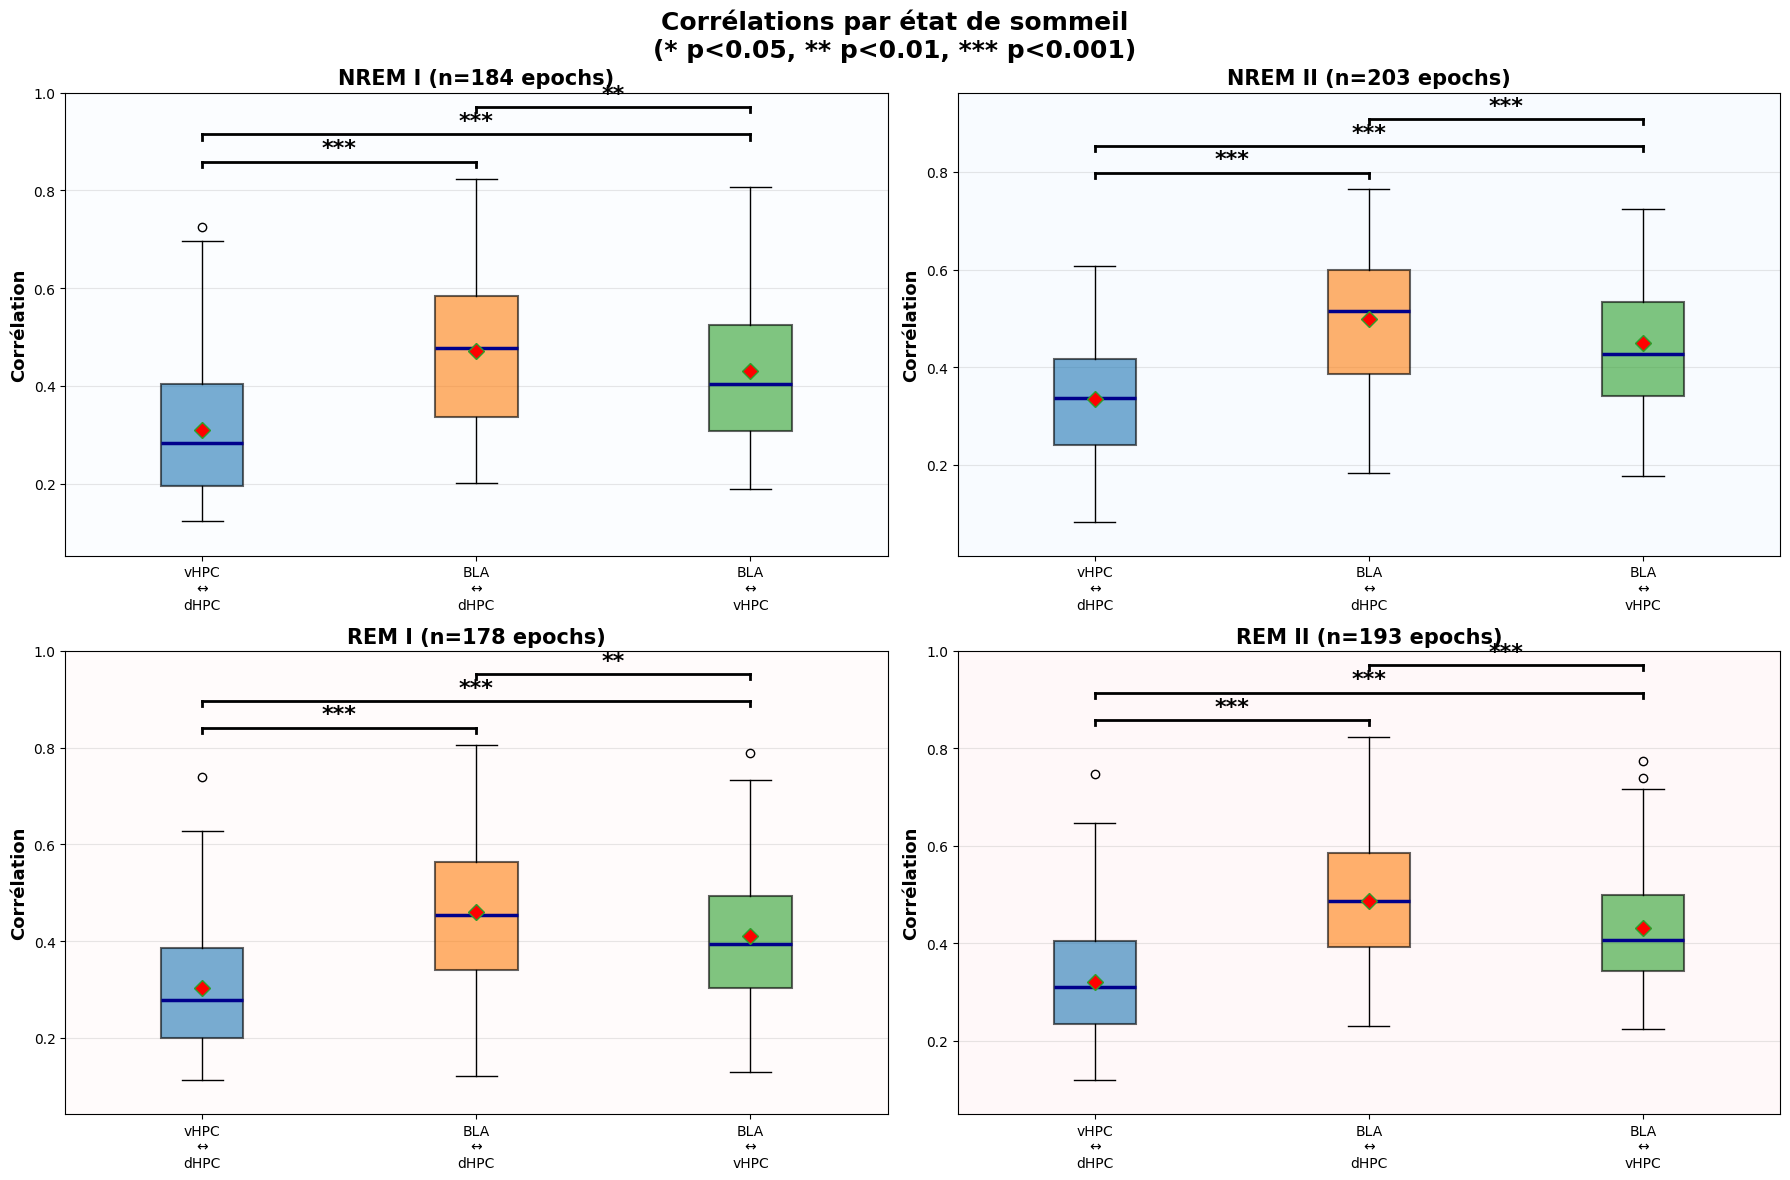

C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:168: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([data1, data2],
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:168: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([data1, data2],
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:168: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([data1, data2],
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:168: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3

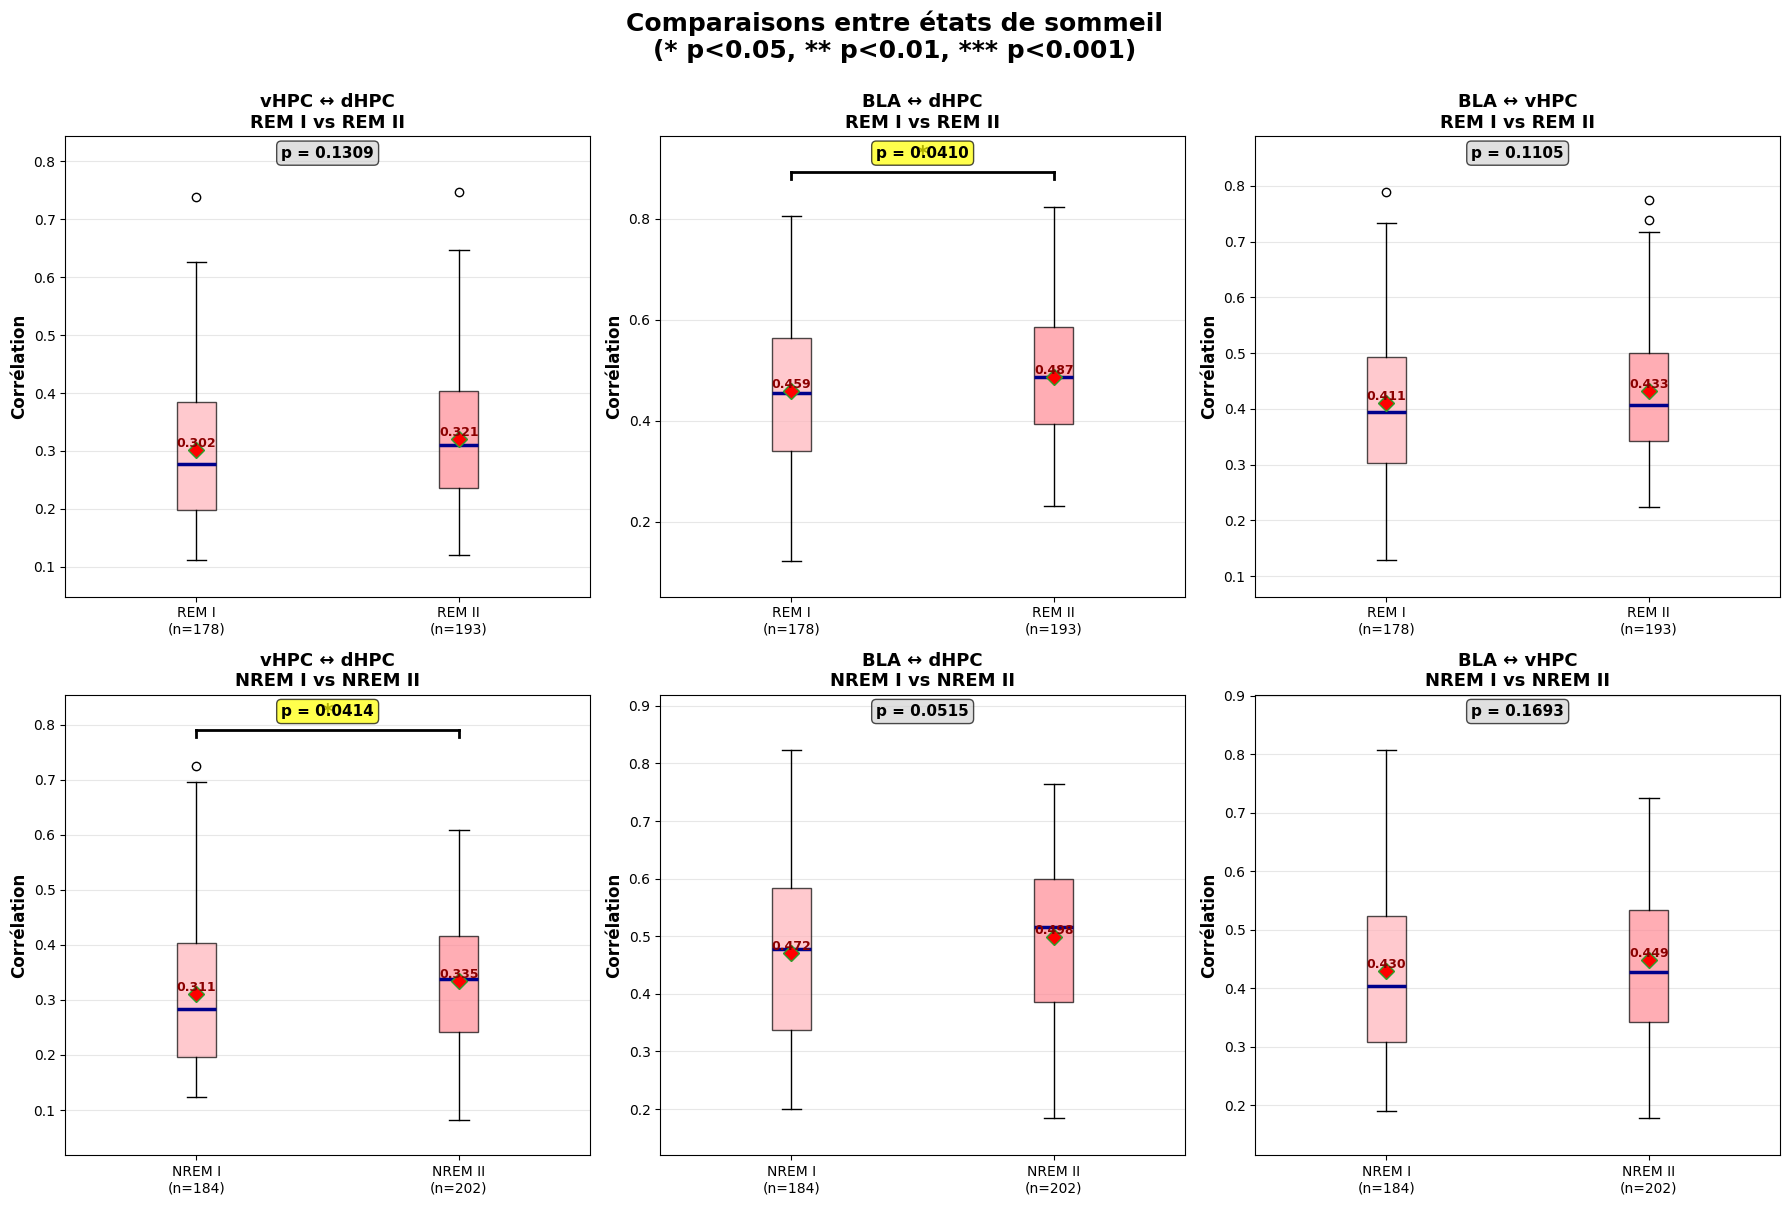

C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:279: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([diff_clean],
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:279: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([diff_clean],
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:279: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([diff_clean],
C:\Users\gabri\AppData\Local\Temp\ipykernel_52052\2220700832.py:279: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; su

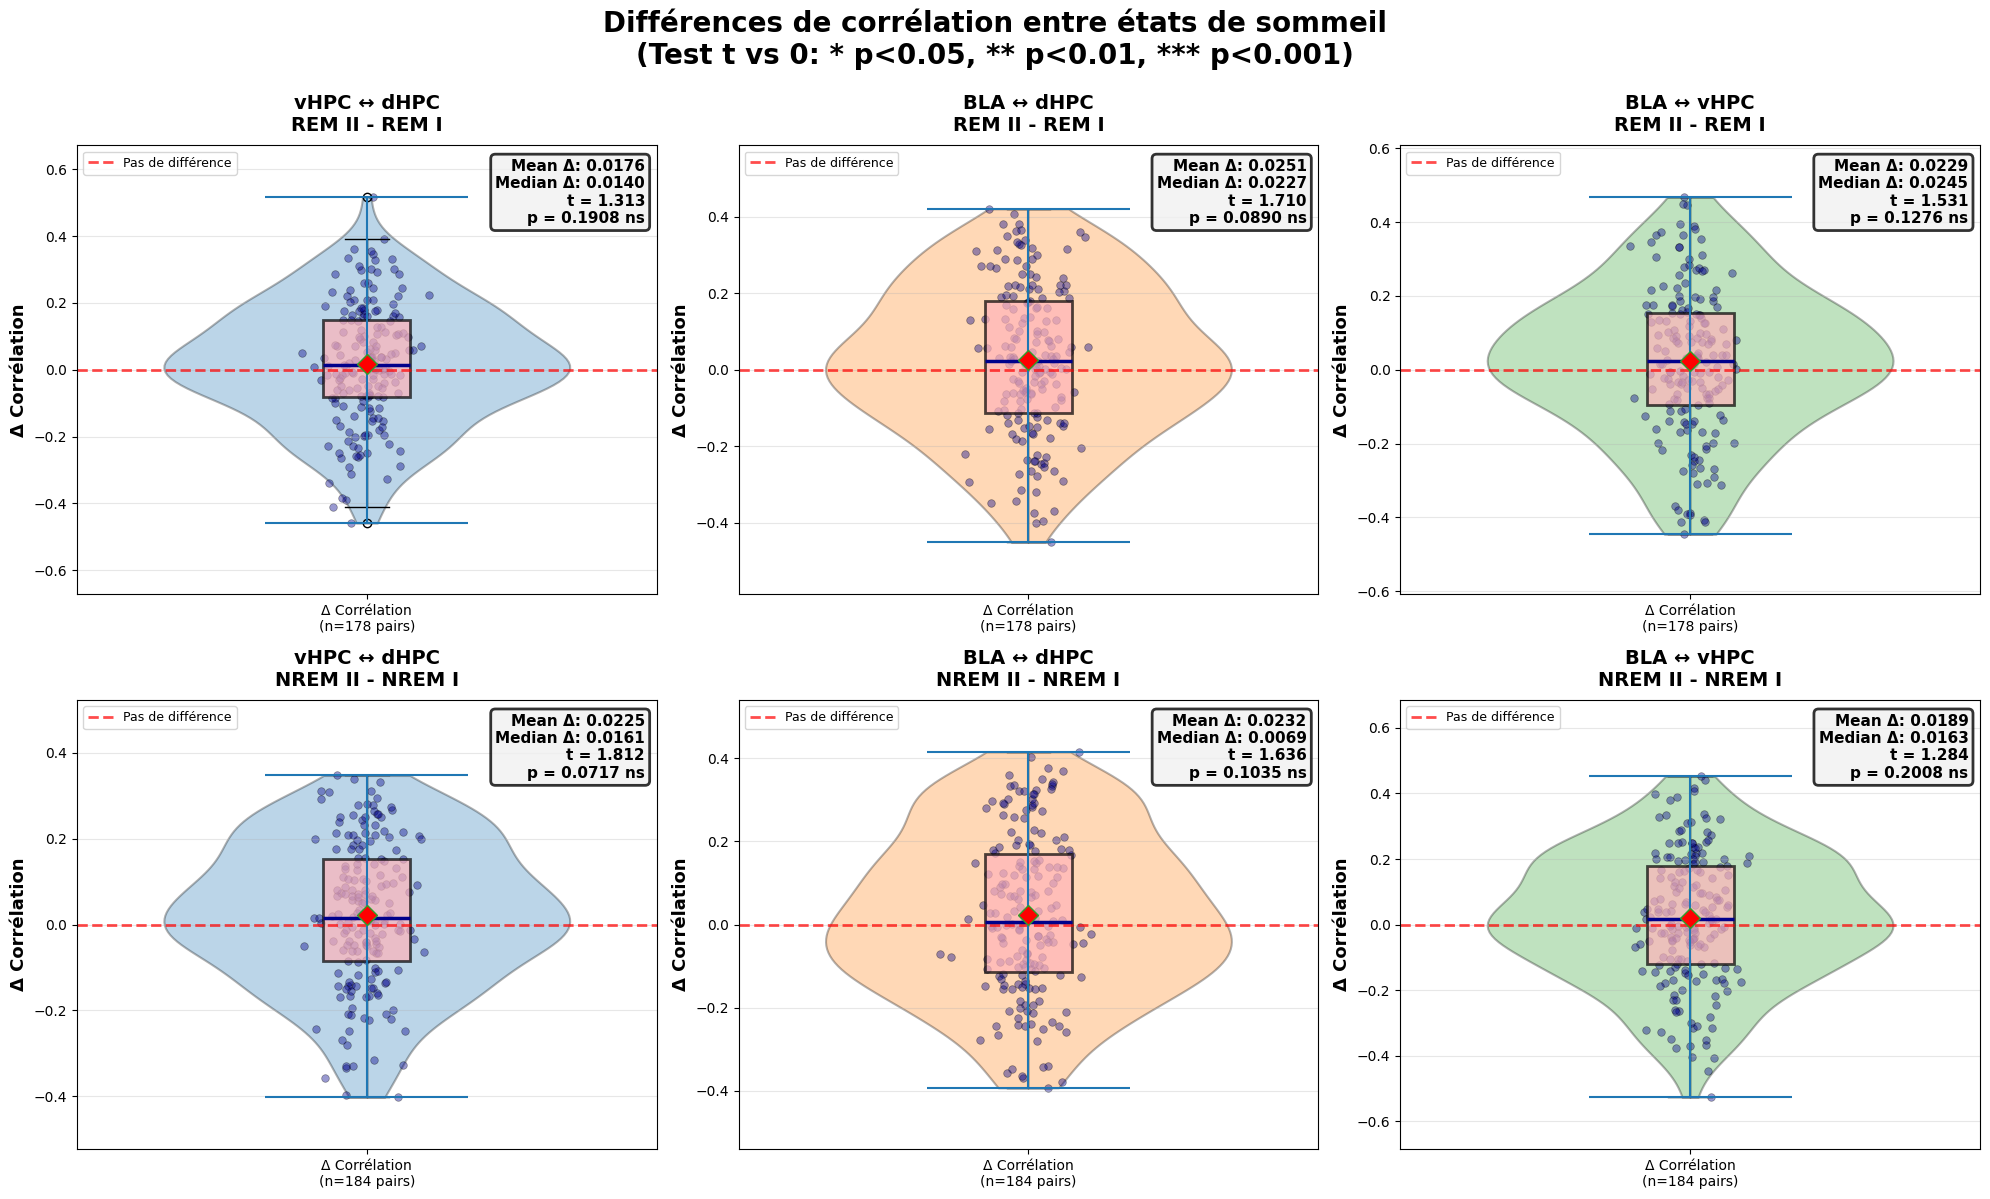

In [6]:
pkl_path_rw = "data\lfp_epochs_with_spikes_by_region-rw-2.pkl" # You should place here the path to where the .pkl file with the LFP/Single unit information is :D

with open(pkl_path_rw, "rb") as f:
    df2 = pickle_compat.load(f)

print(df2.head())

plot_correlations_boxplot_by_state(df2)

plot_state_comparisons(df2)

plot_correlation_differences(df2)

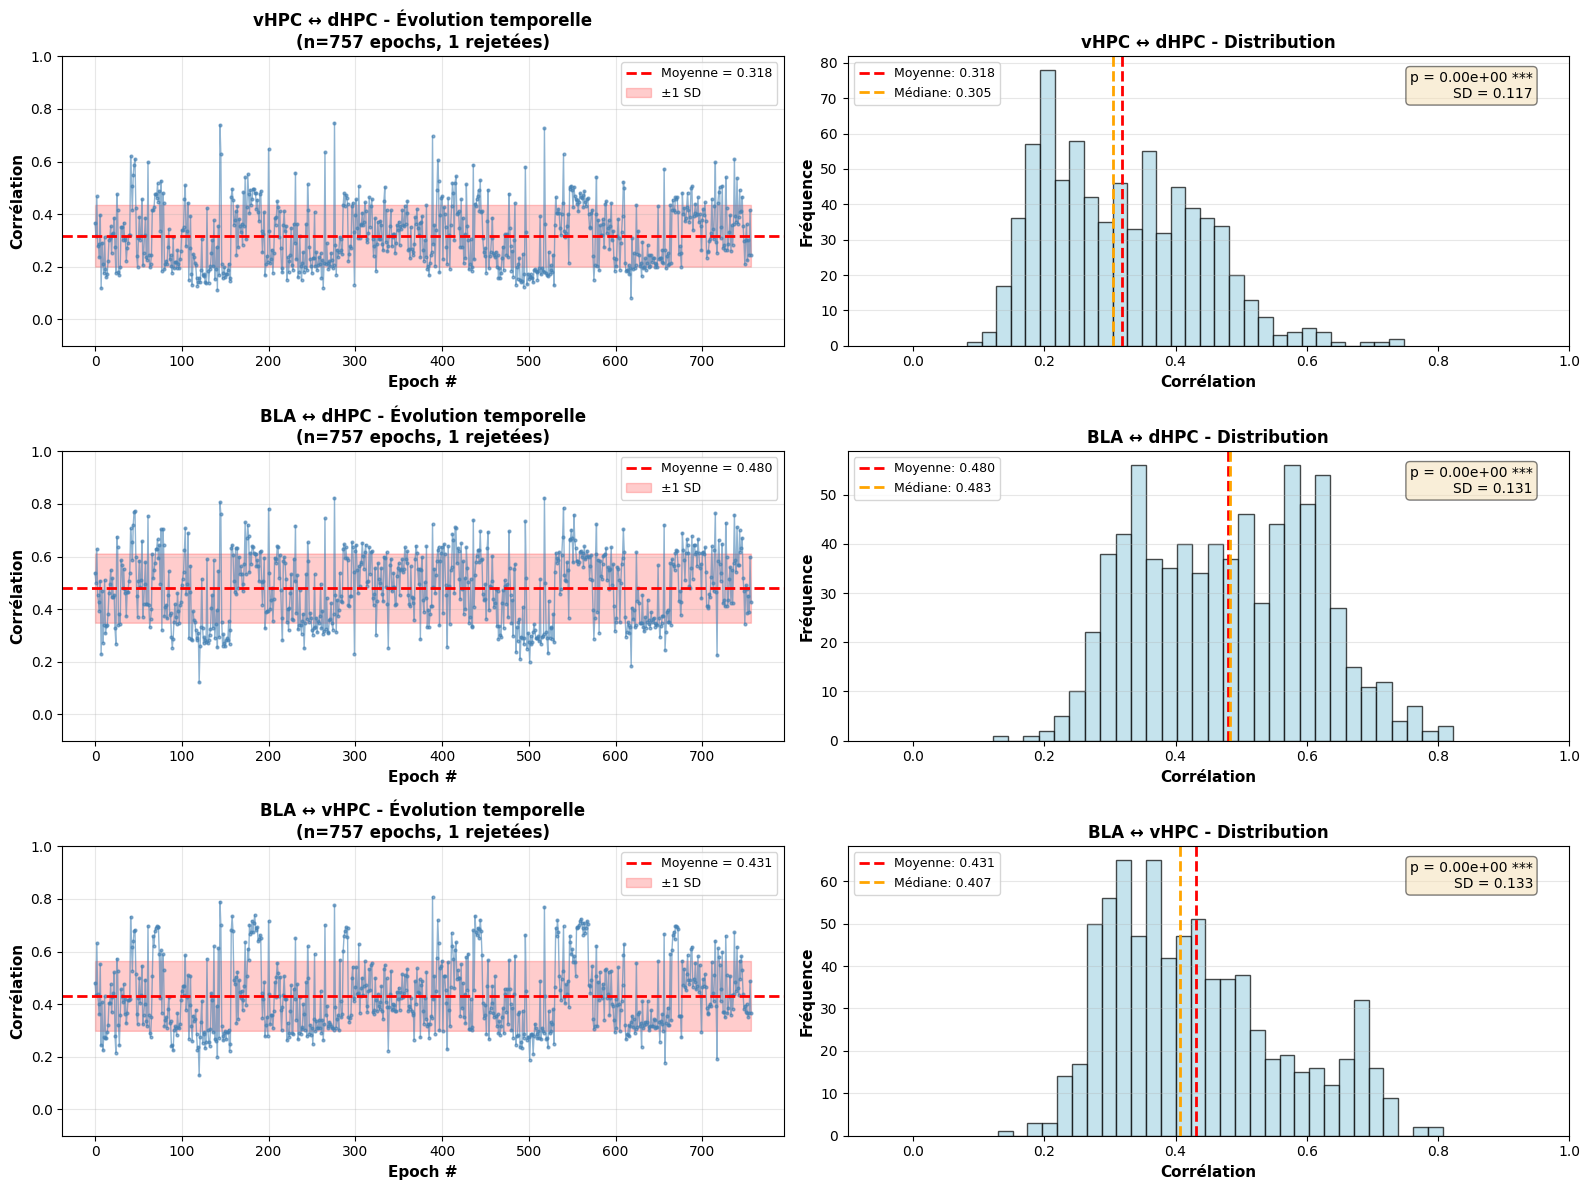

RÉSUMÉ DES CORRÉLATIONS INTER-RÉGIONALES

vHPC ↔ dHPC:
  Epochs valides: 757 / 758 (99.9%)
  Epochs rejetées: 1
  Corrélation: 0.3177 ± 0.1173
  Médiane: 0.3054
  Intervalle: [0.083, 0.748]
  Test t: t=74.47, p=0.00e+00 (***)

BLA ↔ dHPC:
  Epochs valides: 757 / 758 (99.9%)
  Epochs rejetées: 1
  Corrélation: 0.4798 ± 0.1314
  Médiane: 0.4829
  Intervalle: [0.121, 0.823]
  Test t: t=100.41, p=0.00e+00 (***)

BLA ↔ vHPC:
  Epochs valides: 757 / 758 (99.9%)
  Epochs rejetées: 1
  Corrélation: 0.4313 ± 0.1325
  Médiane: 0.4072
  Intervalle: [0.129, 0.808]
  Test t: t=89.47, p=0.00e+00 (***)


In [7]:
results = run_complete_correlation_analysis(df2)